# ECON 441B: Week 9 Assignment
Courtney Manhart

## 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week 9/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 4
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

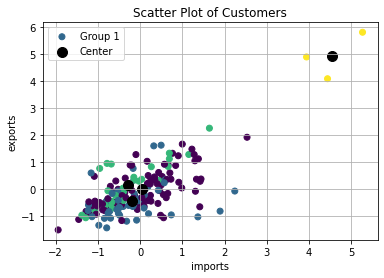

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 3 # Imports
x2_index = 1 # Exports


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, 
            cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], 
            kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(['Group 1', 'Center'])
plt.grid()
plt.show()

## 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

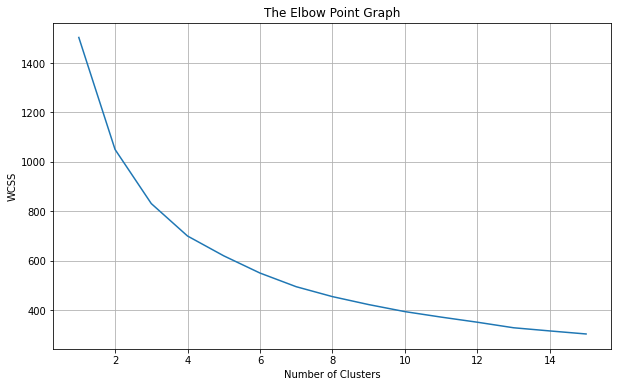

In [12]:
## Testing ks
ks = np.arange(1, 16, 1)
WCSSs = []

for k in ks:
  kmeans = KMeans(n_clusters= k, n_init = 30,
                  random_state=42).fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(ks, WCSSs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Point Graph')
plt.grid()
plt.show()

## 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Based on the elbow graph above, I would chose 4 number of clusters. The economic intuition behind 4 is to hopefully identify the different combinations of high and low imports and exports:

*   High Imports & High Exports
*   High Imports & Low Exports
*   Low Imports & High Exports
*   Low Imports & Low Exports


In [13]:
## Fitting the Model based on the Optimal Number of Clusters
k = 4
kmeans = KMeans(n_clusters= k, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [14]:
## Predicting Clusters

predicts = pd.DataFrame(kmeans.predict(X_scaled), columns = ['Prediction'])

output = pd.concat([predicts, names], axis = 1)
output

,Prediction,country
0,1,Afghanistan
1,0,Albania
2,0,Algeria
3,1,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,1,Yemen


In [15]:
clusters = range(k)
for clust in clusters:
  print('Cluster {}:'.format(clust))
  print(list(output[output['Prediction'] == clust]['country']))
  print('\n')

Cluster 0:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Tong

It looks like many developed Countries such as Australia, France, Germany, the UK, and the US are all grouped in the same cluster. Many developing countries that might be low importers & exporters are grouped together. 

##6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [16]:
Q6DF = pd.concat([predicts, X], axis = 1)

Q6DF.groupby('Prediction').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Prediction,,,,,,,,,
0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


## 7.) Write an observation about the descriptive statistics.

Cluster 1 (prediction =0), which contains countries such as China, Belize, and more, have low averge exports and high average imports sompared to others clusters while also having the 2nd highest child mortality rate. 

Cluster 2 (prediction = 1), which contains countries such as Botswana and Haiti, have low average imports and low average exports, while also having the lowest average income and inflation. These countries are developing countries. 

Cluster 3 (prediction =2), which contains the US, UK, France and Germany, have high average exports and low average imports, while having one of the largest life-expectance and highest GDP, but also having the highest average health rating. 

Cluster 4 (prediction =2), which contains only 3 countries - Luxembourg, Malta, and Singapore - are some of the wealthiest countries with high average imports and high average exports. Additionally, these countries have the largest average income and GDP. 